# Overview

We will use a rolling average model, with a time period of 30 days, for the Sonona and Austin intake and outcomes data. I originally did a 7 day rolling average, but the large variability in the data produces a large variability in rolling average. Our baseline model will be the assumption that 2024 will be similar to 2023. Most shelter statistics we found are year-over-year comparisons. 

# Rolling average forecast

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from seaborn import set_style
from sklearn.metrics import mean_squared_error

set_style("whitegrid")

In [228]:
#read in shelter data 
shelter_data = pd.read_csv("../../main_data/CleanedDataOnePlace.csv")

# Convert 'Date' column to datetime objects
shelter_data['Date'] = pd.to_datetime(shelter_data['Date'])

/var/folders/rl/kqt6tbv90l9_pwc4927vdb340000gn/T/ipykernel_97302/1454077153.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  shelter_data['Date'] = pd.to_datetime(shelter_data['Date'])


In [229]:
# find the index with Jan 1, 2024

first_day24 = shelter_data[shelter_data['Date'] == '2024-01-01'].index[0]
print(first_day24)

3744


In [230]:
shelter_train = shelter_data.iloc[:first_day24].copy()
shelter_test = shelter_data.iloc[first_day24:].copy()

In [231]:
# checking our split worked
print(shelter_train)

           Date  SonomaIntakeTotals  SonomaOutcomeTotals  SonomaDifferences  \
0    2013-10-01                 NaN                  NaN                NaN   
1    2013-10-02                 NaN                  NaN                NaN   
2    2013-10-03                 NaN                  NaN                NaN   
3    2013-10-04                 NaN                  NaN                NaN   
4    2013-10-05                 NaN                  NaN                NaN   
...         ...                 ...                  ...                ...   
3739 2023-12-27                 2.0                  1.0                1.0   
3740 2023-12-28                 2.0                  1.0                1.0   
3741 2023-12-29                 2.0                  4.0               -2.0   
3742 2023-12-30                 3.0                  3.0                0.0   
3743 2023-12-31                 2.0                  0.0                2.0   

      SonomaRatio  Sonoma_intake_stray_abandoned  \

In [232]:
print(shelter_test)

           Date  SonomaIntakeTotals  SonomaOutcomeTotals  SonomaDifferences  \
3744 2024-01-01                 0.0                  0.0                0.0   
3745 2024-01-02                 5.0                  1.0                4.0   
3746 2024-01-03                 6.0                  3.0                3.0   
3747 2024-01-04                 5.0                  7.0               -2.0   
3748 2024-01-05                 6.0                  2.0                4.0   
...         ...                 ...                  ...                ...   
3878 2024-05-14                 5.0                  4.0                1.0   
3879 2024-05-15                 5.0                  2.0                3.0   
3880 2024-05-16                 NaN                  NaN                NaN   
3881 2024-05-17                 NaN                  NaN                NaN   
3882 2024-05-18                 NaN                  NaN                NaN   

      SonomaRatio  Sonoma_intake_stray_abandoned  \

## Sonoma 


### Intakes

We will define a rolling average on Stray Abandoned, Owner Surrender, Public Assistance, and Other Intake, as well as total intakes. We believe these different categories are useful to shelters, as they may require different staffing or resources.

In [233]:
# Sonoma data actually starts Jan 1, 2014
# Let's further refine the test data

# find the index with Jan 1, 2014

first_day_sonoma = shelter_data[shelter_data['Date'] == '2014-01-01'].index[0]
print(first_day_sonoma)

92


In [234]:
shelter_train_sonoma = shelter_data.iloc[first_day_sonoma:first_day24].copy()
print(shelter_train_sonoma)

           Date  SonomaIntakeTotals  SonomaOutcomeTotals  SonomaDifferences  \
92   2014-01-01                 1.0                  1.0                0.0   
93   2014-01-02                13.0                  1.0               12.0   
94   2014-01-03                 4.0                  1.0                3.0   
95   2014-01-04                 8.0                  1.0                7.0   
96   2014-01-05                 2.0                  1.0                1.0   
...         ...                 ...                  ...                ...   
3739 2023-12-27                 2.0                  1.0                1.0   
3740 2023-12-28                 2.0                  1.0                1.0   
3741 2023-12-29                 2.0                  4.0               -2.0   
3742 2023-12-30                 3.0                  3.0                0.0   
3743 2023-12-31                 2.0                  0.0                2.0   

      SonomaRatio  Sonoma_intake_stray_abandoned  \

In [235]:
Sonoma_trained_intake_averages = pd.DataFrame({'Date':shelter_train_sonoma['Date'],
                  'Sonoma_intake_stray_abandoned':shelter_train_sonoma.Sonoma_intake_stray_abandoned,
                  'stray_rolling_avg':shelter_train_sonoma.Sonoma_intake_stray_abandoned.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_intake_owner_surrender':shelter_train_sonoma.Sonoma_intake_owner_surrender,
                  'owner_surrender_rolling_avg':shelter_train_sonoma.Sonoma_intake_owner_surrender.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_intake_public_assist':shelter_train_sonoma.Sonoma_intake_public_assist,
                  'public_assist_rolling_avg':shelter_train_sonoma.Sonoma_intake_public_assist.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_intake_other':shelter_train_sonoma.Sonoma_intake_other_i,
                  'other_intake_rolling_avg':shelter_train_sonoma.Sonoma_intake_other_i.rolling(30,
                                                                closed='left').mean(),
                'SonomaIntakeTotals':shelter_train_sonoma.SonomaIntakeTotals,
                  'SonomaIntakeTotals_rolling_avg':shelter_train_sonoma.SonomaIntakeTotals.rolling(30,
                                                                closed='left').mean()
                                                                }).reset_index(drop=True)

In [236]:
print(Sonoma_trained_intake_averages)

           Date  Sonoma_intake_stray_abandoned  stray_rolling_avg  \
0    2014-01-01                            1.0                NaN   
1    2014-01-02                            6.0                NaN   
2    2014-01-03                            2.0                NaN   
3    2014-01-04                            4.0                NaN   
4    2014-01-05                            2.0                NaN   
...         ...                            ...                ...   
3647 2023-12-27                            2.0           3.233333   
3648 2023-12-28                            2.0           3.200000   
3649 2023-12-29                            2.0           3.000000   
3650 2023-12-30                            1.0           3.000000   
3651 2023-12-31                            2.0           2.966667   

      Sonoma_intake_owner_surrender  owner_surrender_rolling_avg  \
0                               0.0                          NaN   
1                               4.0

Let's just plot the rolling averages

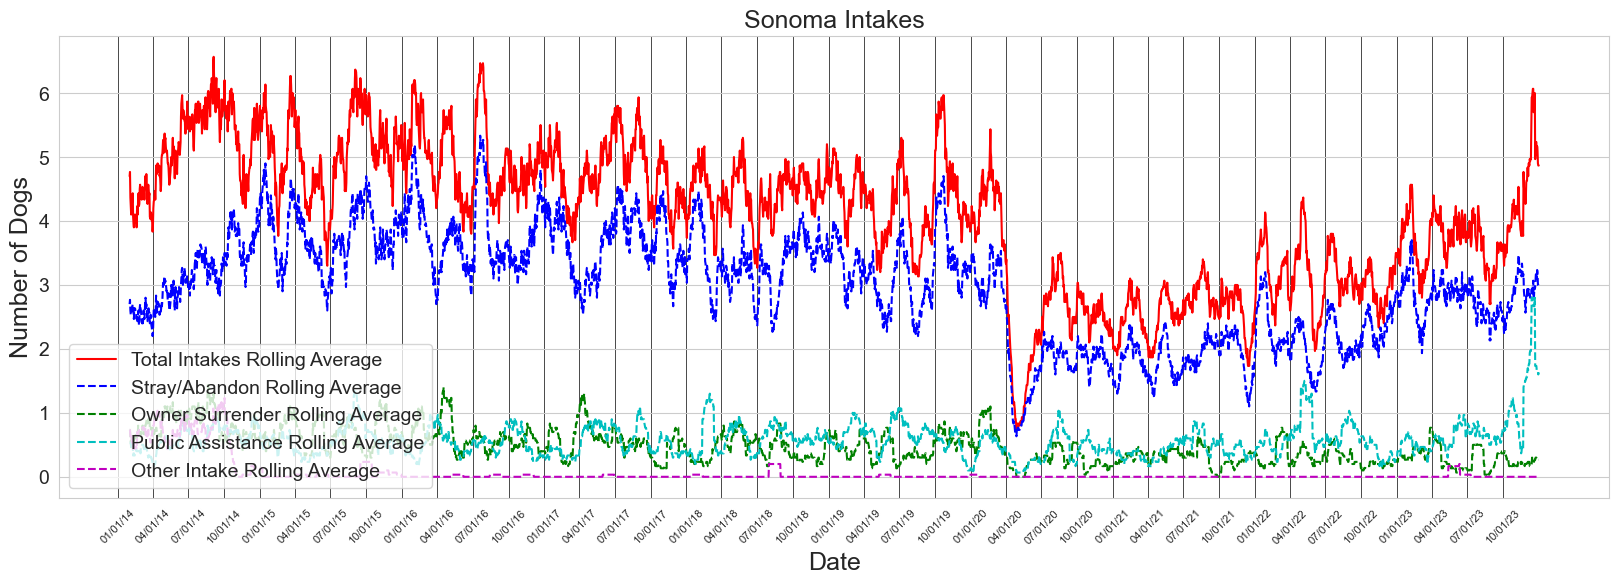

In [237]:
plt.figure(figsize=(20,6))

plt.plot(Sonoma_trained_intake_averages.Date, 
         Sonoma_trained_intake_averages.SonomaIntakeTotals_rolling_avg,
         'r',
         label="Total Intakes Rolling Average")

plt.plot(Sonoma_trained_intake_averages.Date, 
         Sonoma_trained_intake_averages.stray_rolling_avg,
         'b--',
         label="Stray/Abandon Rolling Average")

plt.plot(Sonoma_trained_intake_averages.Date, 
         Sonoma_trained_intake_averages.owner_surrender_rolling_avg,
         'g--',
         label="Owner Surrender Rolling Average")

plt.plot(Sonoma_trained_intake_averages.Date, 
         Sonoma_trained_intake_averages.public_assist_rolling_avg,
         'c--',
         label="Public Assistance Rolling Average")

plt.plot(Sonoma_trained_intake_averages.Date, 
         Sonoma_trained_intake_averages.other_intake_rolling_avg,
         'm--',
         label="Other Intake Rolling Average")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Sonoma Intakes", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/14', end='12/31/23', freq='QS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

Let's just look at 2023 and forecasting 2024

In [238]:
# Find first day 2023

first_day23 = Sonoma_trained_intake_averages[Sonoma_trained_intake_averages['Date'] == '2023-01-01'].index[0]


print(Sonoma_trained_intake_averages.Date.iloc[first_day23])

2023-01-01 00:00:00


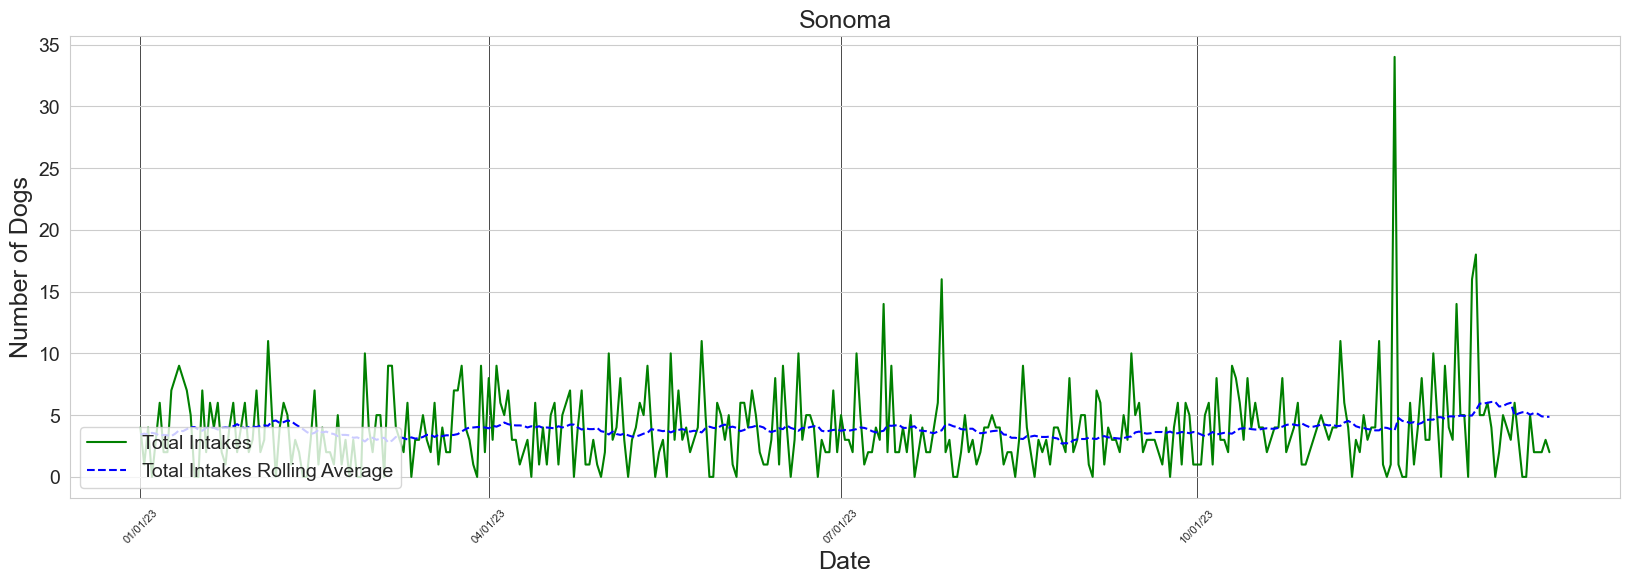

In [239]:
plt.figure(figsize=(20,6))


plt.plot(Sonoma_trained_intake_averages.Date[first_day23:], 
         Sonoma_trained_intake_averages.SonomaIntakeTotals[first_day23:],
         'g',
         label="Total Intakes")

plt.plot(Sonoma_trained_intake_averages.Date[first_day23:], 
         Sonoma_trained_intake_averages.SonomaIntakeTotals_rolling_avg[first_day23:],
         'b--',
         label="Total Intakes Rolling Average")


plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Sonoma", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/23', end='12/31/23', freq='QS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

#### Intake Forecast

We will take the 2023 rolling averages and use those as the prediction for 2024.

In [240]:
# copy the 2023 data
columns_to_copy = ['Date', 'stray_rolling_avg','owner_surrender_rolling_avg','public_assist_rolling_avg','other_intake_rolling_avg','SonomaIntakeTotals_rolling_avg']

rows2023 = Sonoma_trained_intake_averages.loc[first_day23:, columns_to_copy].copy()

# add one year to the dates

rows2023['Date'] = rows2023['Date'] + pd.DateOffset(years=1)

# merge into original list

Sonoma_intake_averages = pd.concat([Sonoma_trained_intake_averages, rows2023], ignore_index=True)

In [241]:
print(Sonoma_intake_averages)

           Date  Sonoma_intake_stray_abandoned  stray_rolling_avg  \
0    2014-01-01                            1.0                NaN   
1    2014-01-02                            6.0                NaN   
2    2014-01-03                            2.0                NaN   
3    2014-01-04                            4.0                NaN   
4    2014-01-05                            2.0                NaN   
...         ...                            ...                ...   
4012 2024-12-27                            NaN           3.233333   
4013 2024-12-28                            NaN           3.200000   
4014 2024-12-29                            NaN           3.000000   
4015 2024-12-30                            NaN           3.000000   
4016 2024-12-31                            NaN           2.966667   

      Sonoma_intake_owner_surrender  owner_surrender_rolling_avg  \
0                               0.0                          NaN   
1                               4.0

Now we add in the actual data through May 15, 2024

In [242]:
###not currently working

columns_to_append= ['Sonoma_intake_stray_abandoned','Sonoma_intake_owner_surrender', 'Sonoma_intake_public_assist',
                'SonomaIntakeTotals']

for col in columns_to_append:
    Sonoma_intake_averages[col] = shelter_test.apply(lambda row: row[col] if row['Date'] in Sonoma_intake_averages['Date'].values else Sonoma_intake_averages[col], axis=1)

print(Sonoma_intake_averages)

           Date Sonoma_intake_stray_abandoned  stray_rolling_avg  \
0    2014-01-01                           NaN                NaN   
1    2014-01-02                           NaN                NaN   
2    2014-01-03                           NaN                NaN   
3    2014-01-04                           NaN                NaN   
4    2014-01-05                           NaN                NaN   
...         ...                           ...                ...   
4012 2024-12-27                           NaN           3.233333   
4013 2024-12-28                           NaN           3.200000   
4014 2024-12-29                           NaN           3.000000   
4015 2024-12-30                           NaN           3.000000   
4016 2024-12-31                           NaN           2.966667   

     Sonoma_intake_owner_surrender  owner_surrender_rolling_avg  \
0                              NaN                          NaN   
1                              NaN               

In [243]:
# Find first day 2024

first_day24 = Sonoma_intake_averages[Sonoma_intake_averages['Date'] == '2024-01-01'].index[0]


print(Sonoma_intake_averages.Date.iloc[first_day24])

2024-01-01 00:00:00


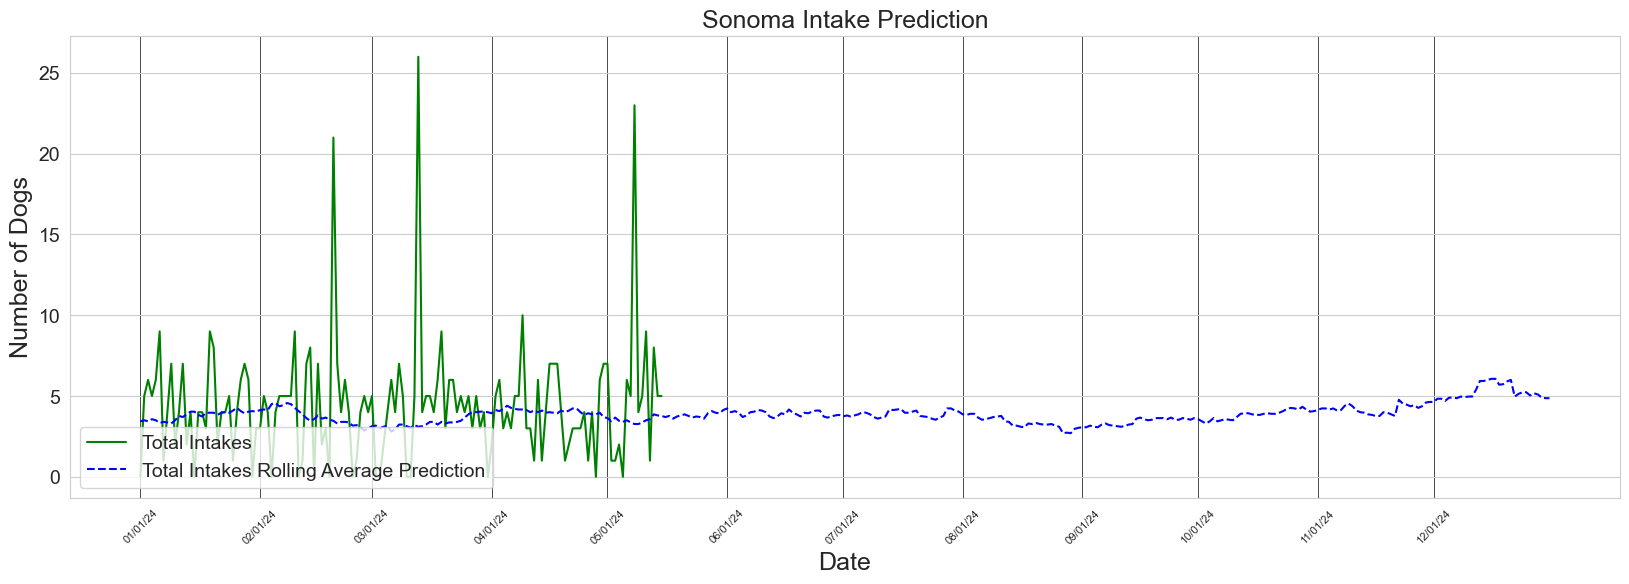

In [244]:
plt.figure(figsize=(20,6))


plt.plot(shelter_test.Date, 
         shelter_test.SonomaIntakeTotals,
         'g',
         label="Total Intakes")

plt.plot(Sonoma_intake_averages.Date[first_day24:], 
         Sonoma_intake_averages.SonomaIntakeTotals_rolling_avg[first_day24:],
         'b--',
         label="Total Intakes Rolling Average Prediction")


plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Sonoma Intake Prediction", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/24', end='12/31/24', freq='MS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

### Outcomes

In [245]:
Sonoma_trained_outcome_averages = pd.DataFrame({'Date':shelter_train_sonoma['Date'],
                  'Sonoma_outcome_euthanised':shelter_train_sonoma.Sonoma_outcome_euthanised,
                  'euthanised_rolling_avg':shelter_train_sonoma.Sonoma_outcome_euthanised.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_outcome_adoption':shelter_train_sonoma.Sonoma_outcome_adoption,
                  'adoption_rolling_avg':shelter_train_sonoma.Sonoma_outcome_adoption.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_outcome_return_to_owner':shelter_train_sonoma.Sonoma_outcome_return_to_owner,
                  'return_to_owner_rolling_avg':shelter_train_sonoma.Sonoma_outcome_return_to_owner.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_outcome_unintended':shelter_train_sonoma.Sonoma_outcome_unintended,
                  'outcome_unintended_rolling_avg':shelter_train_sonoma.Sonoma_outcome_unintended.rolling(30,
                                                                closed='left').mean(),
                'Sonoma_outcome_other':shelter_train_sonoma.Sonoma_outcome_other,
                  'outcome_other_rolling_avg':shelter_train_sonoma.Sonoma_outcome_other.rolling(30,
                                                                closed='left').mean(),
                'SonomaOutcomeTotals':shelter_train_sonoma.SonomaOutcomeTotals,
                  'SonomaOutcomeTotals_rolling_avg':shelter_train_sonoma.SonomaOutcomeTotals.rolling(30,
                                                                closed='left').mean()
                                                                })

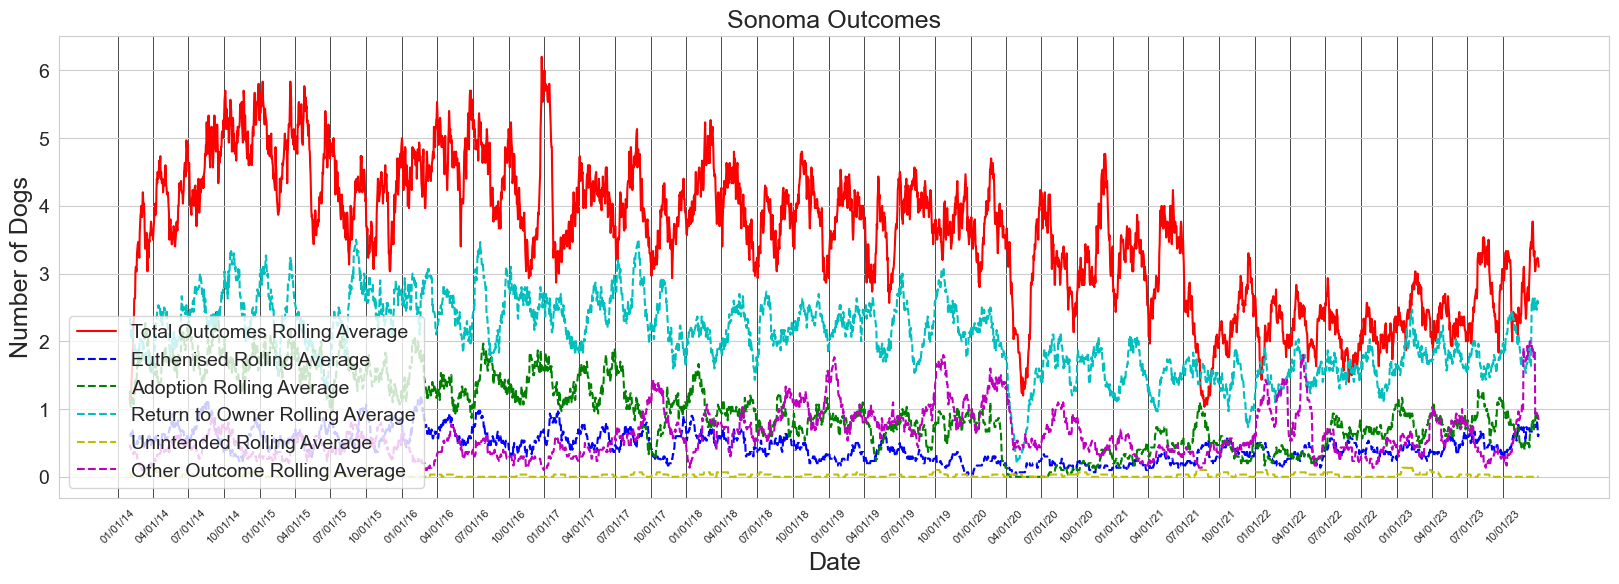

In [246]:
plt.figure(figsize=(20,6))

plt.plot(Sonoma_trained_outcome_averages.Date, 
         Sonoma_trained_outcome_averages.SonomaOutcomeTotals_rolling_avg,
         'r',
         label="Total Outcomes Rolling Average")

plt.plot(Sonoma_trained_outcome_averages.Date, 
         Sonoma_trained_outcome_averages.euthanised_rolling_avg,
         'b--',
         label="Euthenised Rolling Average")

plt.plot(Sonoma_trained_outcome_averages.Date, 
         Sonoma_trained_outcome_averages.adoption_rolling_avg,
         'g--',
         label="Adoption Rolling Average")

plt.plot(Sonoma_trained_outcome_averages.Date, 
         Sonoma_trained_outcome_averages.return_to_owner_rolling_avg,
         'c--',
         label="Return to Owner Rolling Average")

plt.plot(Sonoma_trained_outcome_averages.Date, 
         Sonoma_trained_outcome_averages.outcome_unintended_rolling_avg,
         'y--',
         label="Unintended Rolling Average")

plt.plot(Sonoma_trained_outcome_averages.Date, 
         Sonoma_trained_outcome_averages.outcome_other_rolling_avg,
         'm--',
         label="Other Outcome Rolling Average")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Sonoma Outcomes", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/14', end='12/31/23', freq='QS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

#### Outcomes Forecast

We will repeat the same analysis as the intakes: duplicating the 2023 rolling averages as the prediction for 2024

In [247]:
# copy the 2023 data
columns_to_copy = ['Date', 'euthanised_rolling_avg',
                  'adoption_rolling_avg',
                  'return_to_owner_rolling_avg',
                  'outcome_unintended_rolling_avg',
                  'outcome_other_rolling_avg',
                  'SonomaOutcomeTotals_rolling_avg']

rows2023 = Sonoma_trained_outcome_averages.loc[first_day23:, columns_to_copy].copy()

# add one year to the dates

rows2023['Date'] = rows2023['Date'] + pd.DateOffset(years=1)

# merge into original list

Sonoma_outcome_averages = pd.concat([Sonoma_trained_outcome_averages, rows2023], ignore_index=True)

In [248]:
# Find first day 2024

first_day24 = Sonoma_outcome_averages[Sonoma_outcome_averages['Date'] == '2024-01-01'].index[0]


print(Sonoma_outcome_averages.Date.iloc[first_day24])

2024-01-01 00:00:00


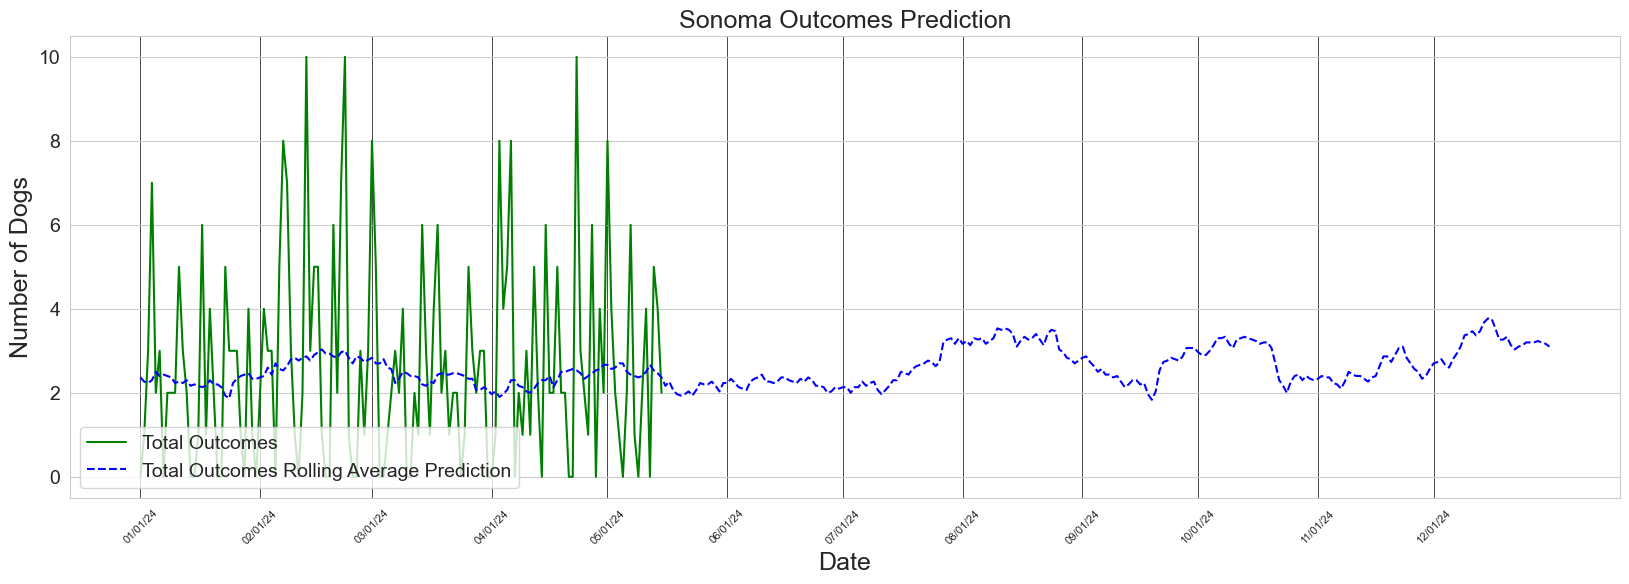

In [249]:
plt.figure(figsize=(20,6))


plt.plot(shelter_test.Date, 
         shelter_test.SonomaOutcomeTotals,
         'g',
         label="Total Outcomes")

plt.plot(Sonoma_outcome_averages.Date[first_day24:], 
         Sonoma_outcome_averages.SonomaOutcomeTotals_rolling_avg[first_day24:],
         'b--',
         label="Total Outcomes Rolling Average Prediction")


plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Sonoma Outcomes Prediction", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/24', end='12/31/24', freq='MS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

## Austin 


### Intakes

We will define a rolling average on Stray Abandoned, Owner Surrender, Public Assistance, and Other Intake, as well as total intakes. We believe these different categories are useful to shelters, as they may require different staffing or resources.

In [250]:
Austin_trained_intake_averages = pd.DataFrame({'Date':shelter_train.Date,
                'Austin_intake_stray_abandoned':shelter_train.Austin_Stray_Abandoned,
                  'stray_rolling_avg':shelter_train.Austin_Stray_Abandoned.rolling(30,
                                                                closed='left').mean(),
                'Austin_euth_req':shelter_train.Austin_Euthanasia_Req,
                  'euth_req_rolling_avg':shelter_train.Austin_Euthanasia_Req.rolling(30,
                                                                closed='left').mean(),
                'Austin_intake_owner_surrender':shelter_train.Austin_Owner_Surrender,
                  'owner_surrender_rolling_avg':shelter_train.Austin_Owner_Surrender.rolling(30,
                                                                closed='left').mean(),
                'Austin_public_assist':shelter_train.Austin_Public_Assist,
                  'public_assist_rolling_avg':shelter_train.Austin_Public_Assist.rolling(30,
                                                                closed='left').mean(),
                'Austin_intake_other':shelter_train.Austin_Other,
                  'other_intake_rolling_avg':shelter_train.Austin_Other.rolling(30,
                                                                closed='left').mean(),
                'AustinIntakeTotals':shelter_train.AustinIntakeTotal,
                  'AustinIntakeTotals_rolling_avg':shelter_train.AustinIntakeTotal.rolling(30,
                                                                closed='left').mean()
                                                                })

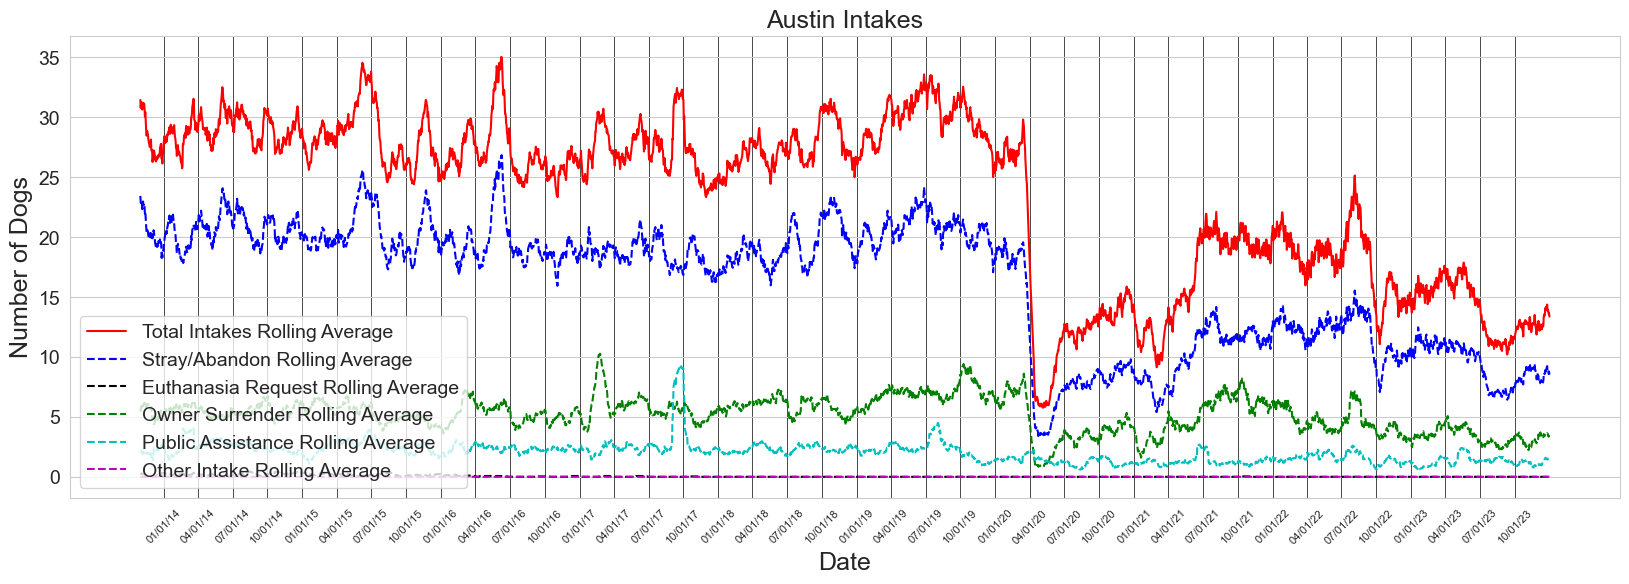

In [251]:
plt.figure(figsize=(20,6))

plt.plot(Austin_trained_intake_averages.Date, 
         Austin_trained_intake_averages.AustinIntakeTotals_rolling_avg,
         'r',
         label="Total Intakes Rolling Average")

plt.plot(Austin_trained_intake_averages.Date, 
         Austin_trained_intake_averages.stray_rolling_avg,
         'b--',
         label="Stray/Abandon Rolling Average")

plt.plot(Austin_trained_intake_averages.Date, 
         Austin_trained_intake_averages.euth_req_rolling_avg,
         'k--',
         label="Euthanasia Request Rolling Average")

plt.plot(Austin_trained_intake_averages.Date, 
         Austin_trained_intake_averages.owner_surrender_rolling_avg,
         'g--',
         label="Owner Surrender Rolling Average")

plt.plot(Austin_trained_intake_averages.Date, 
         Austin_trained_intake_averages.public_assist_rolling_avg,
         'c--',
         label="Public Assistance Rolling Average")

plt.plot(Austin_trained_intake_averages.Date, 
         Austin_trained_intake_averages.other_intake_rolling_avg,
         'm--',
         label="Other Intake Rolling Average")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Austin Intakes", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/14', end='12/31/23', freq='QS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

#### Intake Forecast

We will take the 2023 rolling averages and use those as the prediction for 2024.

In [252]:
# copy the 2023 data
columns_to_copy = ['Date', 'stray_rolling_avg','owner_surrender_rolling_avg','public_assist_rolling_avg','other_intake_rolling_avg','AustinIntakeTotals_rolling_avg']

rows2023 = Austin_trained_intake_averages.loc[first_day23:, columns_to_copy].copy()

# add one year to the dates

rows2023['Date'] = rows2023['Date'] + pd.DateOffset(years=1)

# merge into original list

Austin_intake_averages = pd.concat([Austin_trained_intake_averages, rows2023], ignore_index=True)
print(Austin_intake_averages)


           Date  Austin_intake_stray_abandoned  stray_rolling_avg  \
0    2013-10-01                           30.0                NaN   
1    2013-10-02                           20.0                NaN   
2    2013-10-03                           19.0                NaN   
3    2013-10-04                           24.0                NaN   
4    2013-10-05                           27.0                NaN   
...         ...                            ...                ...   
4196 2024-12-27                            NaN           8.900000   
4197 2024-12-28                            NaN           8.900000   
4198 2024-12-29                            NaN           8.600000   
4199 2024-12-30                            NaN           8.733333   
4200 2024-12-31                            NaN           8.533333   

      Austin_euth_req  euth_req_rolling_avg  Austin_intake_owner_surrender  \
0                 1.0                   NaN                            9.0   
1              

Now we add in the actual data through May 15, 2024


In [253]:
# Find first day 2024

first_day24 = Austin_intake_averages[Austin_intake_averages['Date'] == '2024-01-01'].index[0]


print(Austin_intake_averages.Date.iloc[first_day24])

2024-01-01 00:00:00


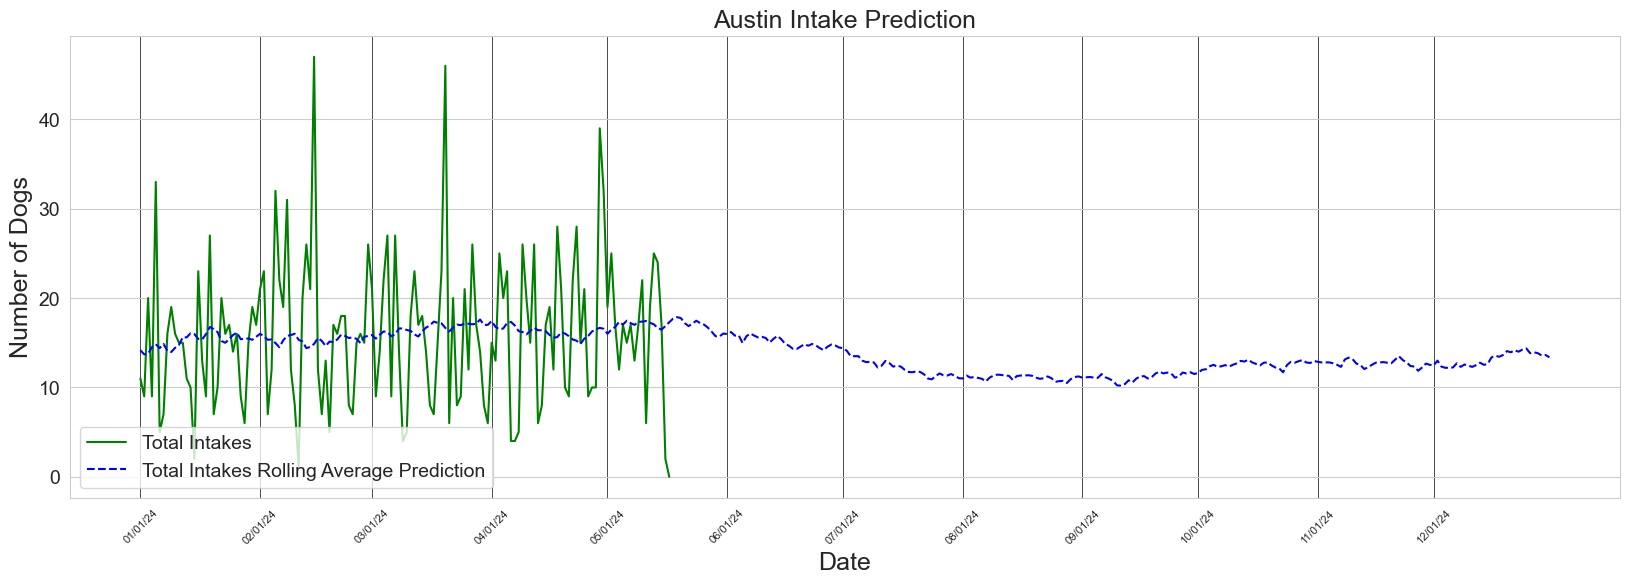

In [254]:
plt.figure(figsize=(20,6))


plt.plot(shelter_test.Date, 
         shelter_test.AustinIntakeTotal,
         'g',
         label="Total Intakes")

plt.plot(Austin_intake_averages.Date[first_day24:], 
         Austin_intake_averages.AustinIntakeTotals_rolling_avg[first_day24:],
         'b--',
         label="Total Intakes Rolling Average Prediction")


plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Austin Intake Prediction", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/24', end='12/31/24', freq='MS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

### Outcomes

In [257]:

Austin_trained_outcome_averages = pd.DataFrame({'Date':shelter_train.Date,
                'Austin_outcome_euthanised':shelter_train.Austin_Euth,
                  'euthanised_rolling_avg':shelter_train.Austin_Euth.rolling(30,
                                                                closed='left').mean(),
                'Austin_outcome_adoption':shelter_train.Austin_Adopt,
                  'adoption_rolling_avg':shelter_train.Austin_Adopt.rolling(30,
                                                                closed='left').mean(),
                'Austin_outcome_return_to_owner':shelter_train.Austin_RTO,
                  'return_to_owner_rolling_avg':shelter_train.Austin_RTO.rolling(30,
                                                                closed='left').mean(),
                'Austin_outcome_unintended':shelter_train.Austin_Unintended,
                  'outcome_unintended_rolling_avg':shelter_train.Austin_Unintended.rolling(30,
                                                                closed='left').mean(),
                'Austin_outcome_other':shelter_train.Austin_Other,
                  'outcome_other_rolling_avg':shelter_train.Austin_Other.rolling(30,
                                                                closed='left').mean(),
                'AustinOutcomeTotals':shelter_train.AustinOutcomeTotal,
                  'AustinOutcomeTotals_rolling_avg':shelter_train.AustinOutcomeTotal.rolling(30,
                                                                closed='left').mean()
                                                                })


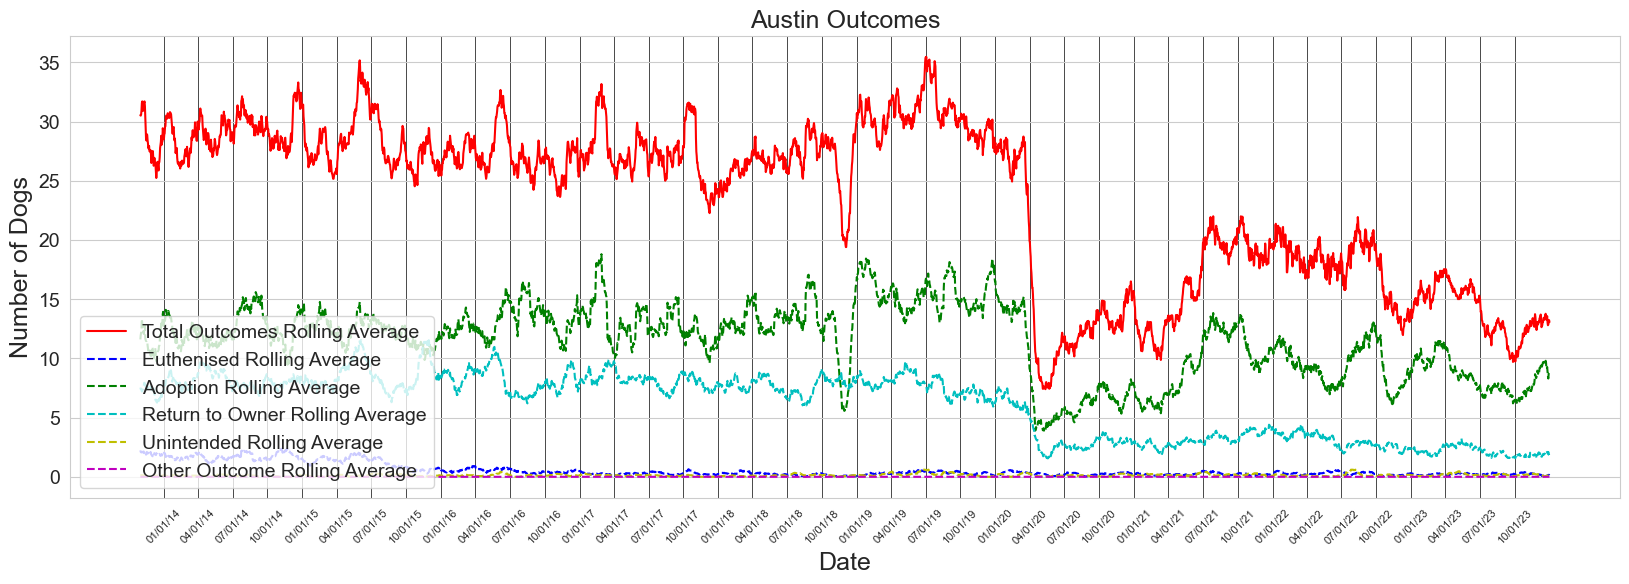

In [259]:
plt.figure(figsize=(20,6))

plt.plot(Austin_trained_outcome_averages.Date, 
         Austin_trained_outcome_averages.AustinOutcomeTotals_rolling_avg,
         'r',
         label="Total Outcomes Rolling Average")

plt.plot(Austin_trained_outcome_averages.Date, 
         Austin_trained_outcome_averages.euthanised_rolling_avg,
         'b--',
         label="Euthenised Rolling Average")

plt.plot(Austin_trained_outcome_averages.Date, 
         Austin_trained_outcome_averages.adoption_rolling_avg,
         'g--',
         label="Adoption Rolling Average")

plt.plot(Austin_trained_outcome_averages.Date, 
         Austin_trained_outcome_averages.return_to_owner_rolling_avg,
         'c--',
         label="Return to Owner Rolling Average")

plt.plot(Austin_trained_outcome_averages.Date, 
         Austin_trained_outcome_averages.outcome_unintended_rolling_avg,
         'y--',
         label="Unintended Rolling Average")

plt.plot(Austin_trained_outcome_averages.Date, 
         Austin_trained_outcome_averages.outcome_other_rolling_avg,
         'm--',
         label="Other Outcome Rolling Average")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Austin Outcomes", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/14', end='12/31/23', freq='QS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()

### Outcomes Forecast

We will repeat the same analysis as the intakes: duplicating the 2023 rolling averages as the prediction for 2024

In [262]:
# copy the 2023 data
columns_to_copy = ['Date', 'euthanised_rolling_avg',
                  'adoption_rolling_avg',
                  'return_to_owner_rolling_avg',
                  'outcome_unintended_rolling_avg',
                  'outcome_other_rolling_avg',
                  'AustinOutcomeTotals_rolling_avg']

rows2023 = Austin_trained_outcome_averages.loc[first_day23:, columns_to_copy].copy()

# add one year to the dates

rows2023['Date'] = rows2023['Date'] + pd.DateOffset(years=1)

# merge into original list

Austin_outcome_averages = pd.concat([Austin_trained_outcome_averages, rows2023], ignore_index=True)


In [263]:
# Find first day 2024

first_day24 = Austin_outcome_averages[Austin_outcome_averages['Date'] == '2024-01-01'].index[0]


print(Austin_outcome_averages.Date.iloc[first_day24])


2024-01-01 00:00:00


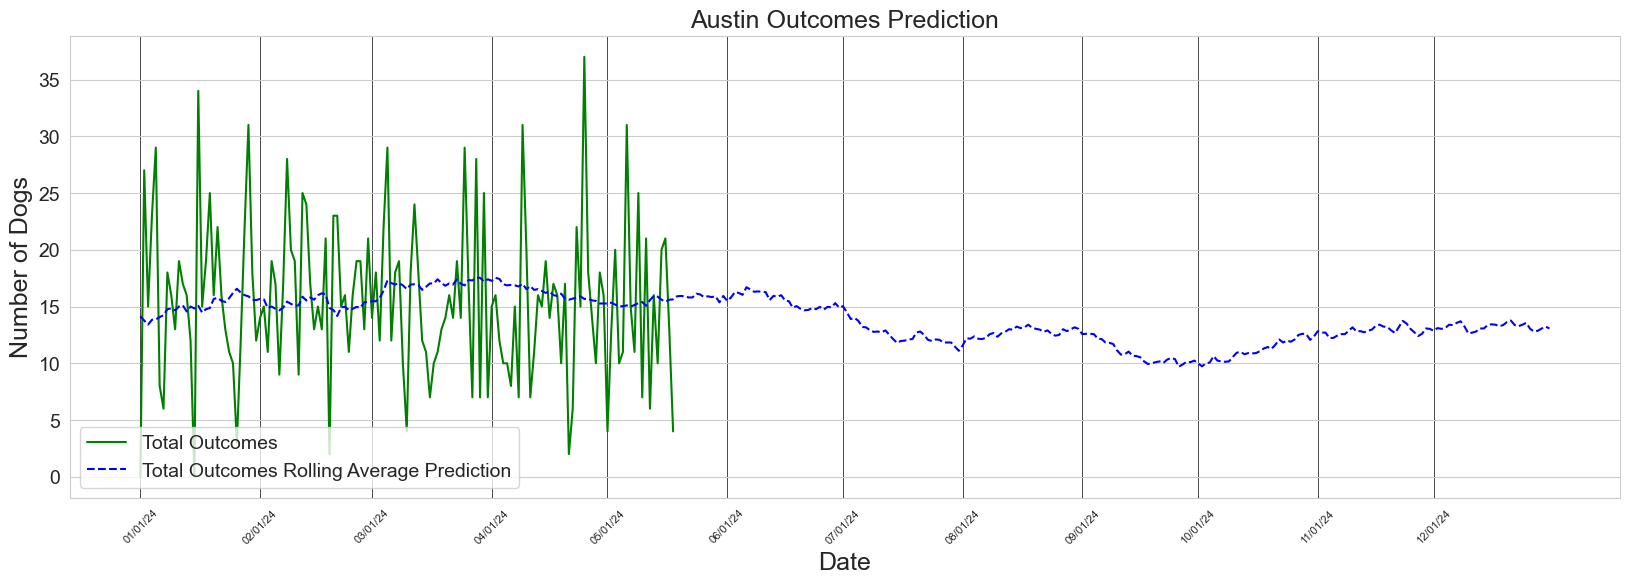

In [266]:
plt.figure(figsize=(20,6))


plt.plot(shelter_test.Date, 
         shelter_test.AustinOutcomeTotal,
         'g',
         label="Total Outcomes")

plt.plot(Austin_outcome_averages.Date[first_day24:], 
         Austin_outcome_averages.AustinOutcomeTotals_rolling_avg[first_day24:],
         'b--',
         label="Total Outcomes Rolling Average Prediction")


plt.xlabel("Date", fontsize=18)
plt.ylabel("Number of Dogs", fontsize=18)
plt.title("Austin Outcomes Prediction", fontsize=18)

# Generate major gridline positions (first of each month)
first_month = pd.date_range(start='1/1/24', end='12/31/24', freq='MS')  # Generate first of each month
major_gridline_labels = [date.strftime('%m/%d/%y') for date in first_month]

# Add gridlines with labels
plt.grid(True, which='major', axis='x', linestyle='-', linewidth='0.5', color='black')
plt.xticks(ticks=first_month, labels=major_gridline_labels, rotation=45, fontsize=8)  # Rotate and adjust fontsize as needed


plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=3)

plt.show()